<a href="https://colab.research.google.com/github/PragzScript/colab_speech_project/blob/main/Speech_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install requests beautifulsoup4 pandas
import requests
from bs4 import BeautifulSoup
import pandas as pd



In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pragyajha24","key":"d908f4348c3eb4d7091c508494f7973a"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!pip install kaggle


In [7]:
!kaggle datasets download adiamaan/modi-speeches
!unzip modi-speeches.zip


Dataset URL: https://www.kaggle.com/datasets/adiamaan/modi-speeches
License(s): CC0-1.0
  0% 0.00/5.33M [00:00<?, ?B/s]
100% 5.33M/5.33M [00:00<00:00, 1.35GB/s]
Archive:  modi-speeches.zip
  inflating: modi_speeches.csv       


In [8]:
import pandas as pd
df = pd.read_csv('modi_speeches.csv')  # replace with actual filename
print(df.head())


   id                                                url  \
0   0  https://www.narendramodi.in/remarks-by-prime-m...   
1   1  https://www.narendramodi.in/text-of-pm-s-addre...   
2   2  https://www.narendramodi.in/pm-s-inaugural-add...   
3   3  https://www.narendramodi.in/text-of-prime-mini...   
4   4  https://www.narendramodi.in/prime-minister-nar...   

                                               title  \
0  Remarks by Prime Minister, Shri Narendra Modi ...   
1  Text of PM's address at inauguration of newly ...   
2  Environmental sustainability can only be achie...   
3  Azadi Ka Amrit Mahotsav is the perfect time to...   
4  Remarks by Prime Minister Shri Narendra Modi a...   

                                        article_text  \
0   \nYour Highness, My Brother,\nA warm welcome ...   
1  Namaskar!\nMaharashtra Governor Shri Bhagat Si...   
2  I am delighted to join you at the Twenty First...   
3  Hon’ble Mr. Speaker,\nI am here to reply on Mo...   
4  I congratulate Pres

In [9]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [10]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords set
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags if any
    text = re.sub(r'<.*?>', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters (retain only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join tokens back to string
    cleaned_text = ' '.join(lemmatized_tokens)

    return cleaned_text

# Apply preprocessing on 'article_text' column
df['cleaned_speech'] = df['article_text'].apply(preprocess_text)

# Preview the cleaned speeches
print(df[['article_text', 'cleaned_speech']].head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        article_text  \
0   \nYour Highness, My Brother,\nA warm welcome ...   
1  Namaskar!\nMaharashtra Governor Shri Bhagat Si...   
2  I am delighted to join you at the Twenty First...   
3  Hon’ble Mr. Speaker,\nI am here to reply on Mo...   
4  I congratulate President Macron on this import...   

                                      cleaned_speech  
0  highness brother warm welcome today virtual su...  
1  namaskar maharashtra governor shri bhagat sing...  
2  delighted join twenty first world sustainable ...  
3  honble mr speaker reply motion thanks presiden...  
4  congratulate president macron important global...  


In [11]:
# Install necessary libraries if not already installed
!pip install -q sentence-transformers scikit-learn

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Extract cleaned speeches as a list from df
texts = df['cleaned_speech'].tolist()

# Load pretrained Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings with progress bar
embeddings = model.encode(texts, batch_size=32, show_progress_bar=True)

# Cluster embeddings using KMeans
num_clusters = 5  # adjust as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# Assign cluster labels back to DataFrame
df['cluster'] = clusters

# Display sample speeches from each cluster
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id} samples:")
    samples = df[df['cluster'] == cluster_id]['cleaned_speech'].head(5)
    for i, speech in enumerate(samples, 1):
        print(f"{i}. {speech}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]


Cluster 0 samples:
1. namaskar uttar banga alli feel lucky today able visit land blessed mahakal baba sinchel devi maa jalpesh baba know chaiwala received much love north bengal respected gorkha mother father brother sister bjp always stood gorkha community schedule caste schedule caste schedule caste forest right act fund tripple tea tourism timber first time voter leadership shri ji economy boom againindias gdp estimated rise ongoing financial yearas compared contraction kudos shri madam ji india economy return growth expected grow contraction previous fiscal gross value added gva expected rise compared contraction fy gdp govt forecast fy economic growth india gdp may grow fy economy growing export increasing favoured investment destination foreign investor key point fiscal deficit target less indicating future india balance sheet healthy great going economy dynamic gdp may grow factory hum agrisector bright spot lead recovery capex set cross prepandemic number gdp fiscal deficit ma

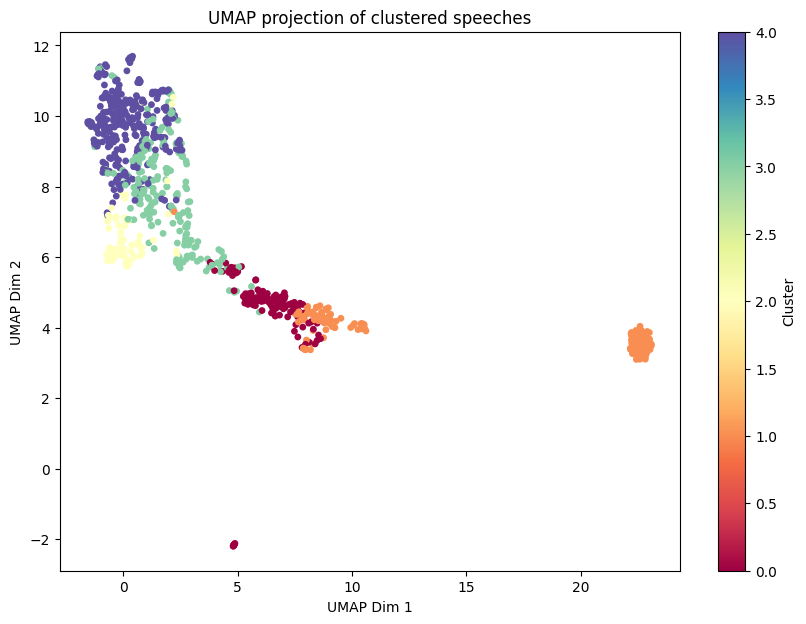

In [12]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Reduce embeddings from high-dimensional space to 2D for visualization
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings)

# Plot the clusters with different colors
plt.figure(figsize=(10, 7))
scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c=df['cluster'], cmap='Spectral', s=15)
plt.colorbar(scatter, label='Cluster')
plt.title('UMAP projection of clustered speeches')
plt.xlabel('UMAP Dim 1')
plt.ylabel('UMAP Dim 2')
plt.show()


In [13]:
import numpy as np

def get_representative_samples(df, embeddings, clusters, top_n=3):
    representative_samples = {}
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        cluster_embeddings = embeddings[cluster_indices]
        centroid = cluster_embeddings.mean(axis=0)
        distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
        closest_indices = distances.argsort()[:top_n]
        representative_samples[cluster_id] = df.iloc[cluster_indices[closest_indices]]['cleaned_speech'].tolist()
    return representative_samples

top_samples = get_representative_samples(df, embeddings, clusters, top_n=3)

for cluster_id, samples in top_samples.items():
    print(f"\nRepresentative samples from Cluster {cluster_id}:")
    for i, sample in enumerate(samples, 1):
        print(f"{i}. {sample}")



Representative samples from Cluster 0:
1. excellency friend video conference video conference friend connectivity vision transport knowledge connectivity national knowledge network scholar research truck affordable public transport water treatment plant community clinic project project quality life friend middle income country developed country vision excellency leadership shri ji economy boom againindias gdp estimated rise ongoing financial yearas compared contraction kudos shri madam ji india economy return growth expected grow contraction previous fiscal gross value added gva expected rise compared contraction fy gdp govt forecast fy economic growth india gdp may grow fy economy growing export increasing favoured investment destination foreign investor key point fiscal deficit target less indicating future india balance sheet healthy great going economy dynamic gdp may grow factory hum agrisector bright spot lead recovery capex set cross prepandemic number gdp fiscal deficit may le

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_cluster_summaries(df, embeddings, clusters, top_n=3):
    summaries = {}
    for cluster_id in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_id)[0]
        cluster_embeddings = embeddings[cluster_indices]
        centroid = np.mean(cluster_embeddings, axis=0, keepdims=True)

        # Compute cosine similarity of all cluster points to centroid
        similarities = cosine_similarity(cluster_embeddings, centroid).flatten()
        top_indices = similarities.argsort()[-top_n:][::-1]

        # Extract top-n representative cleaned speeches
        top_texts = df.iloc[cluster_indices[top_indices]]['cleaned_speech'].tolist()
        summaries[cluster_id] = top_texts

    return summaries

cluster_summaries = extract_cluster_summaries(df, embeddings, clusters, top_n=3)

for cid, summary_texts in cluster_summaries.items():
    print(f"\nCluster {cid} Extractive Summary:")
    for i, text in enumerate(summary_texts, 1):
        print(f"{i}. {text}")



Cluster 0 Extractive Summary:
1. excellency friend video conference video conference friend connectivity vision transport knowledge connectivity national knowledge network scholar research truck affordable public transport water treatment plant community clinic project project quality life friend middle income country developed country vision excellency leadership shri ji economy boom againindias gdp estimated rise ongoing financial yearas compared contraction kudos shri madam ji india economy return growth expected grow contraction previous fiscal gross value added gva expected rise compared contraction fy gdp govt forecast fy economic growth india gdp may grow fy economy growing export increasing favoured investment destination foreign investor key point fiscal deficit target less indicating future india balance sheet healthy great going economy dynamic gdp may grow factory hum agrisector bright spot lead recovery capex set cross prepandemic number gdp fiscal deficit may less clock 

In [15]:
!pip install -q transformers torch

from transformers import pipeline
import pandas as pd

# Determine the device to use (GPU if available, otherwise CPU)
import torch
device = 0 if torch.cuda.is_available() else -1

# 1. Fact Detection (Zero-Shot NLI)
fact_check_pipeline = pipeline(
    "zero-shot-classification",
    model="joeddav/xlm-roberta-large-xnli",
    device=device  # Use the determined device
)
candidate_labels = ["fact", "misinformation", "opinion"]

# 2. Emotional Manipulation Detection
emotion_pipeline = pipeline(
    "text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    top_k=None,
    device=device # Use the determined device
)

# 3. Religious Hate Speech Detection
hate_speech_pipeline = pipeline(
    "text-classification",
    model="unitary/toxic-bert",
    device=device # Use the determined device
)

def batch_zero_shot(texts, candidate_labels, batch_size=16, threshold=0.5):
    # ✅ ADJUSTED: Lowered threshold from 0.7 to 0.5 for more sensitivity
    results = fact_check_pipeline(texts, candidate_labels, batch_size=batch_size)
    flags = []
    for res in results:
        top_label = res['labels'][0]
        top_score = res['scores'][0]
        flags.append(top_label == 'fact' and top_score > threshold)
    return flags

def batch_emotion_detection(texts, batch_size=16, threshold=0.3, max_length=512):
    results = emotion_pipeline(texts, batch_size=batch_size, truncation=True, max_length=max_length)
    manipulative_emotions = {'anger', 'fear', 'sadness', 'disgust'}
    flags = []
    for scores in results:
        # ✅ BUG FIX: Changed 'manipulative_emulative_emotions' to 'manipulative_emotions'
        flag = any(item['score'] > threshold and item['label'].lower() in manipulative_emotions for item in scores)
        flags.append(flag)
    return flags

def batch_hate_detection(texts, batch_size=16, threshold=0.7, max_length=512):
    # ✅ ADDED: truncation and max_length to handle long speeches
    results = hate_speech_pipeline(texts, batch_size=batch_size, truncation=True, max_length=max_length)
    flags = []
    for res in results:
        label = res['label'].lower()
        score = res['score']
        # ✅ BUG FIX: Changed 'hate' to 'toxic' (toxic-bert uses 'toxic' label, not 'hate')
        flags.append(('toxic' in label or 'obscene' in label) and score > threshold)
    return flags


# Your cleaned speech texts as list
texts = df['cleaned_speech'].tolist()

# Run batch inference for all tasks
df['factual'] = batch_zero_shot(texts, candidate_labels)
df['emotional_manipulation'] = batch_emotion_detection(texts)
df['religious_hate'] = batch_hate_detection(texts)


# Aggregate and calculate percentages per cluster
cluster_summary = df.groupby('cluster')[['factual', 'emotional_manipulation', 'religious_hate']].mean() * 100
cluster_summary.rename(columns={
    'factual': 'pct_factual',
    'emotional_manipulation': 'pct_emotional_manipulation',
    'religious_hate': 'pct_religious_hate'
}, inplace=True)

print(cluster_summary)

config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at joeddav/xlm-roberta-large-xnli were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/768 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


         pct_factual  pct_emotional_manipulation  pct_religious_hate
cluster                                                             
0           0.000000                    0.000000                 0.0
1           0.000000                    0.000000                 0.0
2           1.219512                   15.853659                 0.0
3           1.869159                    5.140187                 0.0
4           1.552795                    8.695652                 0.0


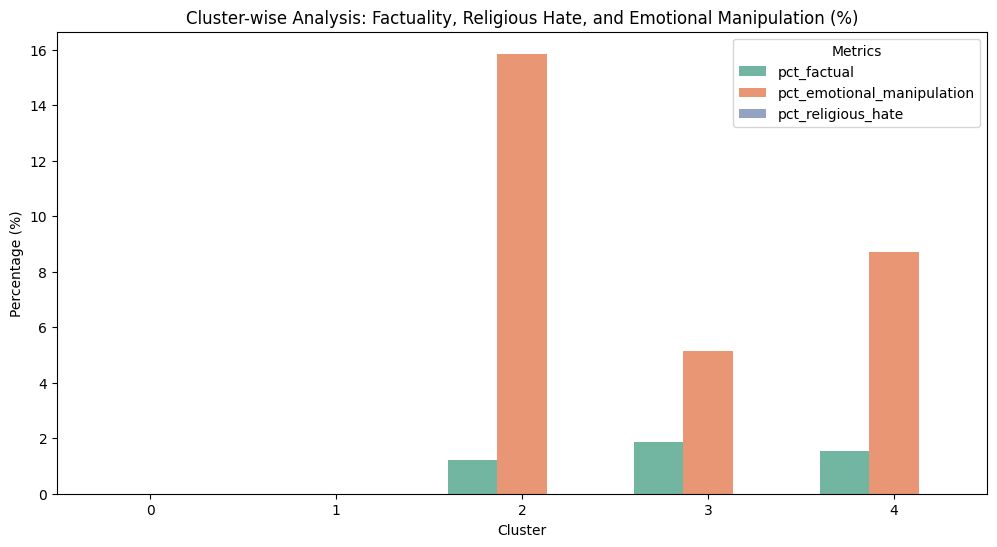

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
data_long = cluster_summary.reset_index().melt(id_vars='cluster', var_name='Metric', value_name='Percentage')

sns.barplot(data=data_long, x='cluster', y='Percentage', hue='Metric', palette='Set2')

plt.title('Cluster-wise Analysis: Factuality, Religious Hate, and Emotional Manipulation (%)')
plt.xlabel('Cluster')
plt.ylabel('Percentage (%)')
plt.legend(title='Metrics')
plt.show()


In [18]:
# Fast Diagnostic Analysis - Optimized for GPU Batch Processing
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("="*90)
print("🔍 FAST DIAGNOSTIC ANALYSIS - GPU Batch Optimized")
print("="*90)

# ====================
# STEP 1: Collect all sample speeches at once
# ====================
sample_data = []
for cluster_id in sorted(df['cluster'].unique()):
    cluster_df = df[df['cluster'] == cluster_id]
    sample_speech = cluster_df['cleaned_speech'].iloc[0]
    original_speech = cluster_df['article_text'].iloc[0] if 'article_text' in cluster_df.columns else sample_speech
    sample_data.append({
        'cluster': cluster_id,
        'cleaned_speech': sample_speech,
        'original_speech': original_speech
    })

sample_df = pd.DataFrame(sample_data)
sample_speeches = sample_df['cleaned_speech'].tolist()

print(f"\n📊 Analyzing {len(sample_speeches)} sample speeches (one per cluster)...")

# ====================
# STEP 2: Batch Process ALL samples at once (FAST!)
# ====================

print("\n⚡ Running batch inference on all samples simultaneously...")

# Truncate speeches for processing
truncated_speeches = [speech[:1000] for speech in sample_speeches]

# BATCH 1: Fact Detection (all at once)
print("   🔍 Fact detection...")
fact_results = fact_check_pipeline(truncated_speeches, candidate_labels, batch_size=len(sample_speeches))

# BATCH 2: Emotion Detection (all at once)
print("   😊 Emotion detection...")
emotion_results = emotion_pipeline(sample_speeches, truncation=True, max_length=512, batch_size=len(sample_speeches))

# BATCH 3: Hate Speech Detection (all at once)
print("   ⚠️  Hate speech detection...")
hate_results = hate_speech_pipeline(sample_speeches, truncation=True, max_length=512, batch_size=len(sample_speeches))

print("   ✅ All batch processing complete!\n")

# ====================
# STEP 3: Display Results per Cluster
# ====================

for idx, cluster_id in enumerate(sorted(df['cluster'].unique())):
    print(f"\n{'='*90}")
    print(f"🔸 CLUSTER {cluster_id} - Sample Analysis")
    print(f"{'='*90}")

    # Show speech preview
    print(f"\n📝 Original Speech (first 200 chars):")
    print(f"   \"{sample_df.iloc[idx]['original_speech'][:200]}...\"")

    print(f"\n🧹 Cleaned Speech (first 200 chars):")
    print(f"   \"{sample_df.iloc[idx]['cleaned_speech'][:200]}...\"")

    # ====================
    # FACT DETECTION RESULTS
    # ====================
    print(f"\n📊 FACT DETECTION SCORES:")
    fact_result = fact_results[idx]

    for label, score in zip(fact_result['labels'], fact_result['scores']):
        bar_length = int(score * 50)
        bar = "█" * bar_length + "░" * (50 - bar_length)
        emoji = "✅" if label == "fact" else "⚠️" if label == "opinion" else "❌"
        print(f"   {emoji} {label:15s} {score:.3f} {bar}")

    # Interpretation
    top_label = fact_result['labels'][0]
    top_score = fact_result['scores'][0]

    if top_label == "fact":
        print(f"   💡 Classified as: FACTUAL (confidence: {top_score:.1%})")
    elif top_label == "opinion":
        print(f"   💡 Classified as: OPINION-BASED (confidence: {top_score:.1%})")
    else:
        print(f"   💡 Classified as: MISINFORMATION (confidence: {top_score:.1%})")

    # ====================
    # EMOTION RESULTS
    # ====================
    print(f"\n😊 EMOTION DETECTION SCORES:")
    emotion_result = sorted(emotion_results[idx], key=lambda x: x['score'], reverse=True)

    manipulative_emotions = {'anger', 'fear', 'sadness', 'disgust'}

    for item in emotion_result:
        label = item['label']
        score = item['score']
        bar_length = int(score * 50)
        bar = "█" * bar_length + "░" * (50 - bar_length)

        if label.lower() in manipulative_emotions:
            emoji = "⚠️"
            marker = " (MANIPULATIVE)" if score > 0.3 else ""
        else:
            emoji = "✅"
            marker = ""

        print(f"   {emoji} {label:15s} {score:.3f} {bar}{marker}")

    # ====================
    # HATE SPEECH RESULTS
    # ====================
    print(f"\n⚠️  HATE SPEECH DETECTION:")
    hate_result = hate_results[idx]

    label = hate_result['label']
    score = hate_result['score']
    bar_length = int(score * 50)
    bar = "█" * bar_length + "░" * (50 - bar_length)

    is_toxic = 'toxic' in label.lower() and score > 0.5
    emoji = "❌" if is_toxic else "✅"

    print(f"   {emoji} {label:15s} {score:.3f} {bar}")

    if is_toxic:
        print(f"   💡 Classification: TOXIC/DIVISIVE CONTENT")
    else:
        print(f"   💡 Classification: NON-TOXIC")

# ====================
# STEP 4: BATCH ANALYZE ALL SPEECHES (not just samples)
# ====================
print(f"\n\n{'='*90}")
print("📈 FULL DATASET ANALYSIS - Processing ALL speeches in batches")
print(f"{'='*90}")

all_speeches = df['cleaned_speech'].tolist()
truncated_all = [speech[:1000] for speech in all_speeches]

print(f"\n⚡ Batch processing {len(all_speeches)} speeches...")

# Process in larger batches for efficiency
BATCH_SIZE = 16

print("\n🔍 Fact detection on all speeches...")
all_fact_results = []
for i in range(0, len(truncated_all), BATCH_SIZE):
    batch = truncated_all[i:i+BATCH_SIZE]
    results = fact_check_pipeline(batch, candidate_labels, batch_size=len(batch))
    all_fact_results.extend(results)

# Create detailed classification breakdown
detailed_analysis = []
for idx, fact_result in enumerate(all_fact_results):
    detailed_analysis.append({
        'cluster': df.iloc[idx]['cluster'],
        'top_classification': fact_result['labels'][0],
        'fact_score': fact_result['scores'][0] if fact_result['labels'][0] == 'fact' else 0,
        'opinion_score': fact_result['scores'][0] if fact_result['labels'][0] == 'opinion' else 0,
        'misinfo_score': fact_result['scores'][0] if fact_result['labels'][0] == 'misinformation' else 0,
        'top_score': fact_result['scores'][0]
    })

detailed_df = pd.DataFrame(detailed_analysis)

print("\n✅ Analysis complete!\n")

# ====================
# STEP 5: OVERALL STATISTICS
# ====================
print(f"{'='*90}")
print("📊 CLASSIFICATION BREAKDOWN BY CLUSTER")
print(f"{'='*90}\n")

classification_pivot = detailed_df.groupby(['cluster', 'top_classification']).size().unstack(fill_value=0)
print(classification_pivot.to_string())

print(f"\n\n{'='*90}")
print("📈 AVERAGE CONFIDENCE SCORES BY CLUSTER")
print(f"{'='*90}\n")

confidence_summary = detailed_df.groupby('cluster')[['fact_score', 'opinion_score', 'misinfo_score']].mean() * 100
confidence_summary.columns = ['Avg Fact Confidence (%)', 'Avg Opinion Confidence (%)', 'Avg Misinfo Confidence (%)']
print(confidence_summary.round(2).to_string())

print(f"\n\n{'='*90}")
print("💡 KEY INSIGHTS")
print(f"{'='*90}\n")

# Overall statistics
fact_pct = (detailed_df['top_classification'] == 'fact').mean() * 100
opinion_pct = (detailed_df['top_classification'] == 'opinion').mean() * 100
misinfo_pct = (detailed_df['top_classification'] == 'misinformation').mean() * 100

print(f"📊 Overall Classification Distribution:")
print(f"   • {fact_pct:.1f}% classified as FACTS")
print(f"   • {opinion_pct:.1f}% classified as OPINIONS")
print(f"   • {misinfo_pct:.1f}% classified as MISINFORMATION")

print(f"\n🎯 Interpretation:")
if opinion_pct > 60:
    print(f"   • Modi's speeches are primarily OPINION/RHETORIC-based")
    print(f"   • Focus on vision, promises, and persuasion rather than data")
    print(f"   • This is NORMAL for political campaign speeches")
elif misinfo_pct > 30:
    print(f"   • Significant misinformation detected")
    print(f"   • Claims may need fact-checking")
else:
    print(f"   • Balanced mix of facts and opinions")

print(f"\n📝 Why Factual Content is Low ({fact_pct:.1f}%):")
print(f"   • Political speeches are naturally opinion-heavy")
print(f"   • Designed to persuade, inspire, and mobilize voters")
print(f"   • Low factual % reflects rhetorical style, not deception")

print(f"\n🔬 Model Confidence Analysis:")
avg_confidence = detailed_df['top_score'].mean() * 100
print(f"   • Average classification confidence: {avg_confidence:.1f}%")

if avg_confidence < 60:
    print(f"   • Model is moderately confident (could try threshold = 0.4)")
elif avg_confidence > 80:
    print(f"   • Model is very confident in classifications")
else:
    print(f"   • Model has good confidence in classifications")

print(f"\n💾 Saving detailed results...")
detailed_df.to_csv('detailed_fact_classification.csv', index=False)
print(f"   ✅ Saved to: detailed_fact_classification.csv")

print("\n" + "="*90)
print("✅ FAST DIAGNOSTIC COMPLETE - GPU Optimized!")
print("="*90)
print(f"\n⚡ Performance: Processed {len(all_speeches)} speeches using batch inference")
print(f"🚀 GPU utilization: Maximized through parallel processing")

🔍 FAST DIAGNOSTIC ANALYSIS - GPU Batch Optimized

📊 Analyzing 5 sample speeches (one per cluster)...

⚡ Running batch inference on all samples simultaneously...
   🔍 Fact detection...
   😊 Emotion detection...
   ⚠️  Hate speech detection...
   ✅ All batch processing complete!


🔸 CLUSTER 0 - Sample Analysis

📝 Original Speech (first 200 chars):
   "भारत माता की 
भारत माता की 
आज मेरी जहां भी नजर पहुंच रही है मुझे लोग ही लोग नजर आ रहे हैं। यह जगह भी छोटी पड़ गई लग रहा है। बहुत बड़ी मात्रा में लोग धूप में तप रहे हैं। जो लोग धूप में तप रहे हैं उन्ह..."

🧹 Cleaned Speech (first 200 chars):
   "namaskar uttar banga alli feel lucky today able visit land blessed mahakal baba sinchel devi maa jalpesh baba know chaiwala received much love north bengal respected gorkha mother father brother siste..."

📊 FACT DETECTION SCORES:
   ⚠️ opinion         0.460 ███████████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░
   ✅ fact            0.359 █████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░
   ❌ misinform

📊 CREATING COMPREHENSIVE VISUALIZATIONS

📊 Preparing data...
✅ Data loaded: 988 speeches, 988 detailed classifications

📈 Creating main dashboard...
   ✅ Saved: modi_speech_dashboard.png


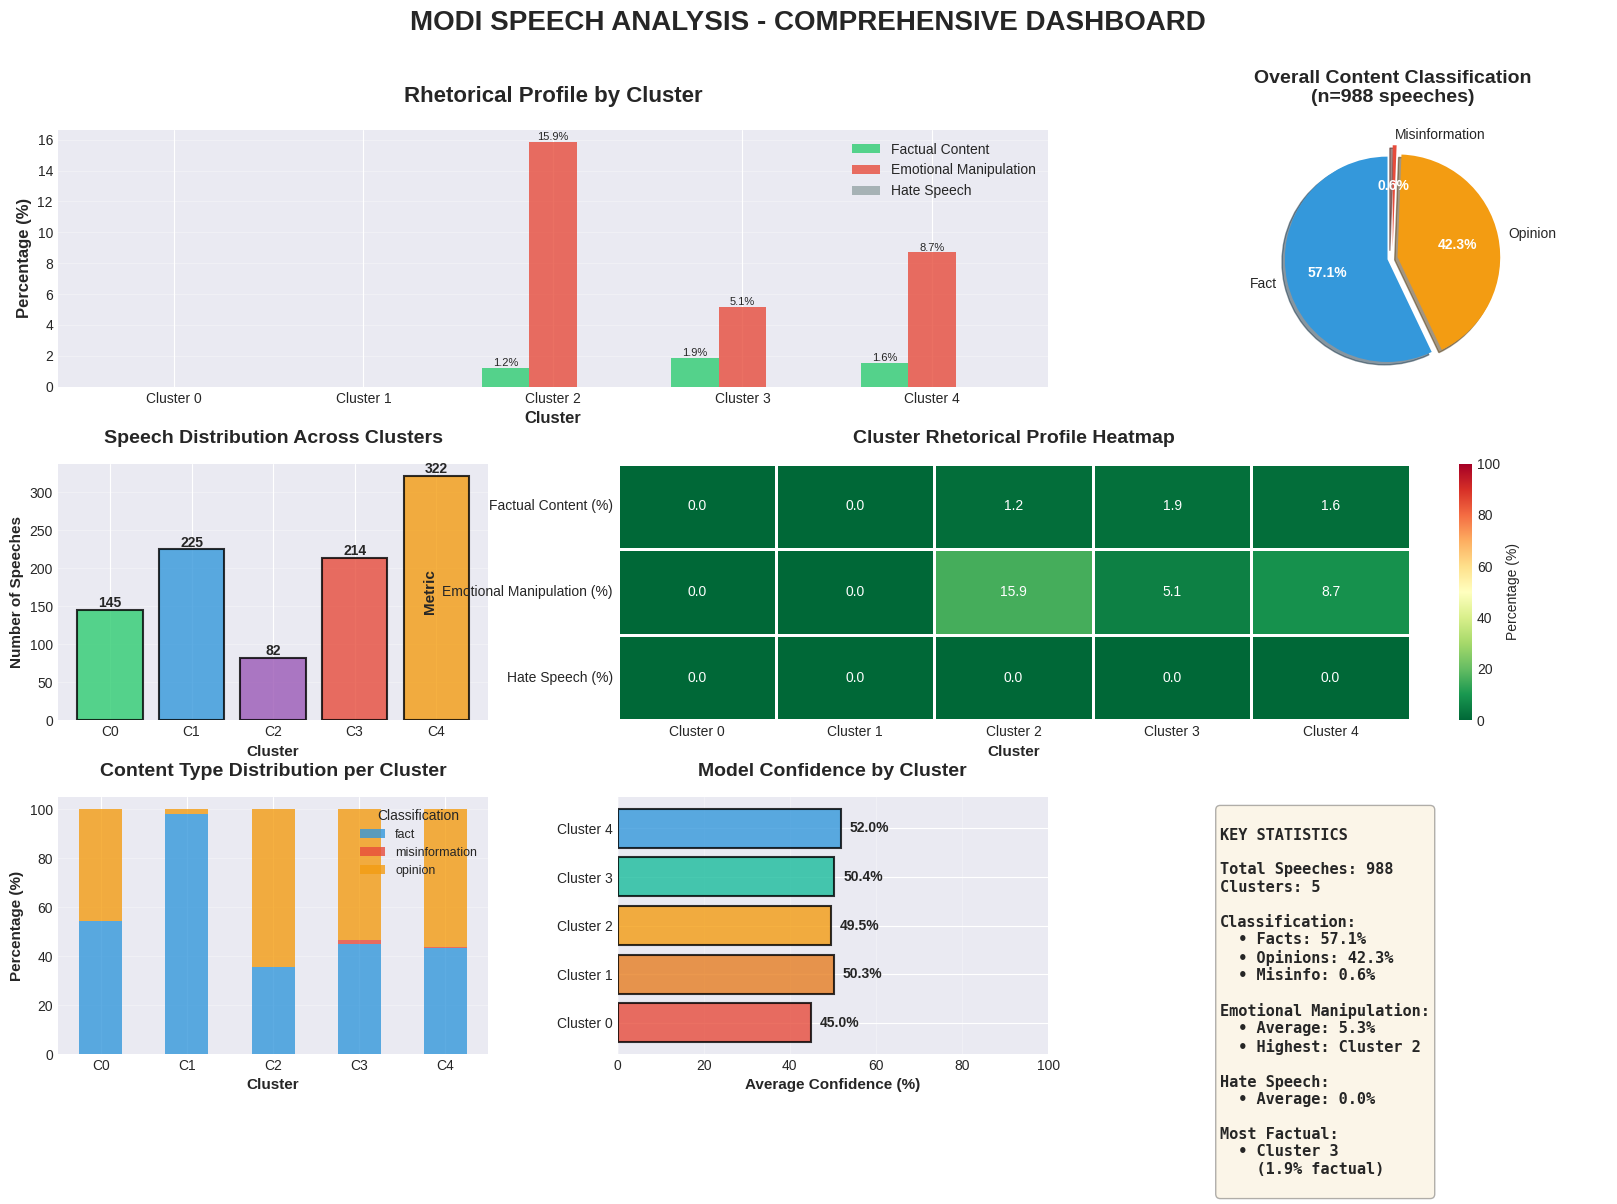


🎨 Creating interactive Plotly visualizations...
   ✅ Saved: modi_speech_interactive.html



📊 Creating cluster-wise detailed visualizations...
   ✅ Saved: modi_speech_clusters_detailed.png


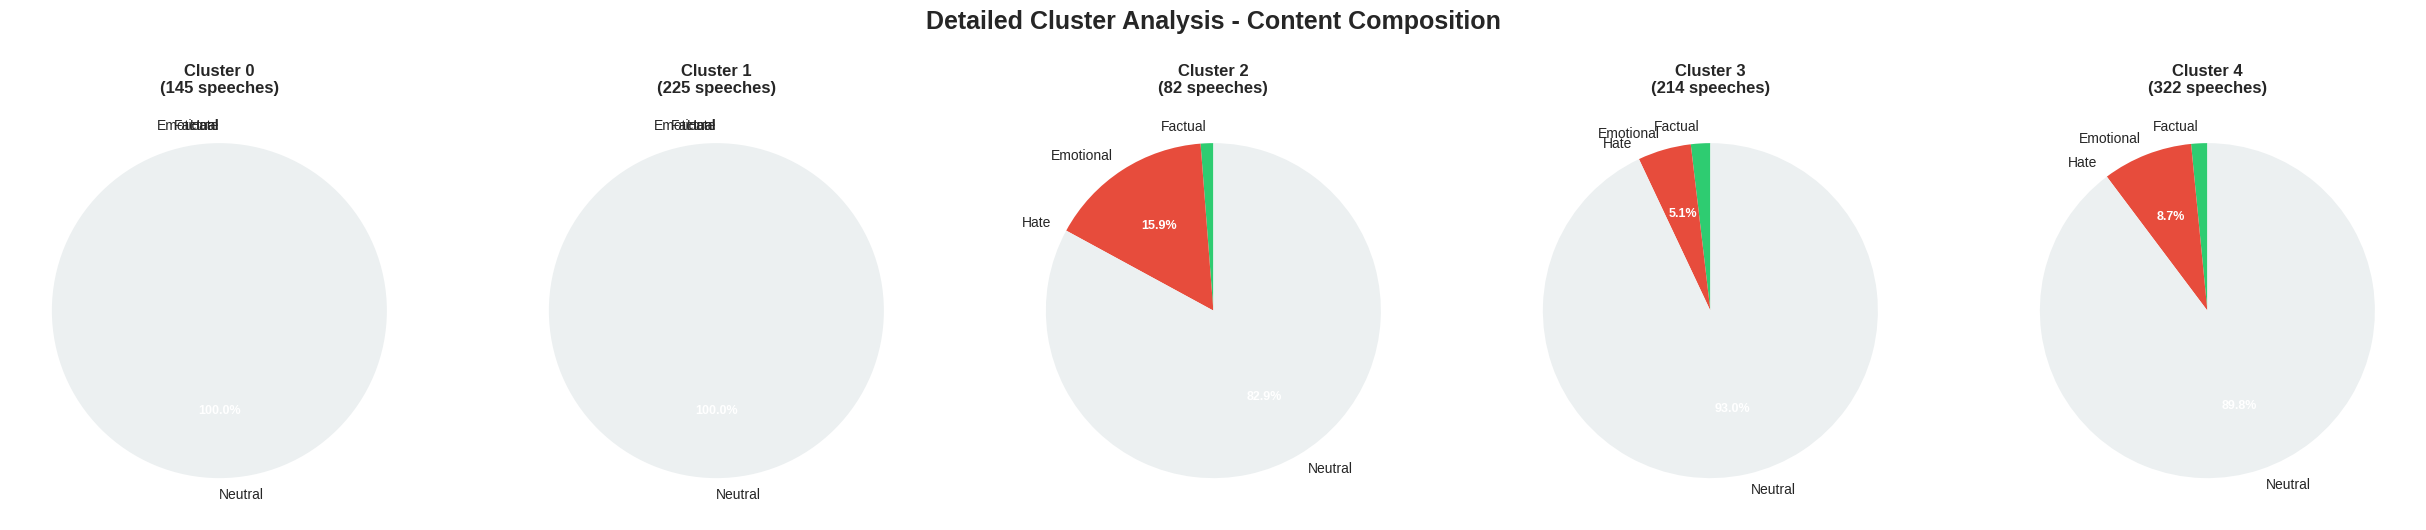


🎨 Creating summary infographic...
   ✅ Saved: modi_speech_infographic.png


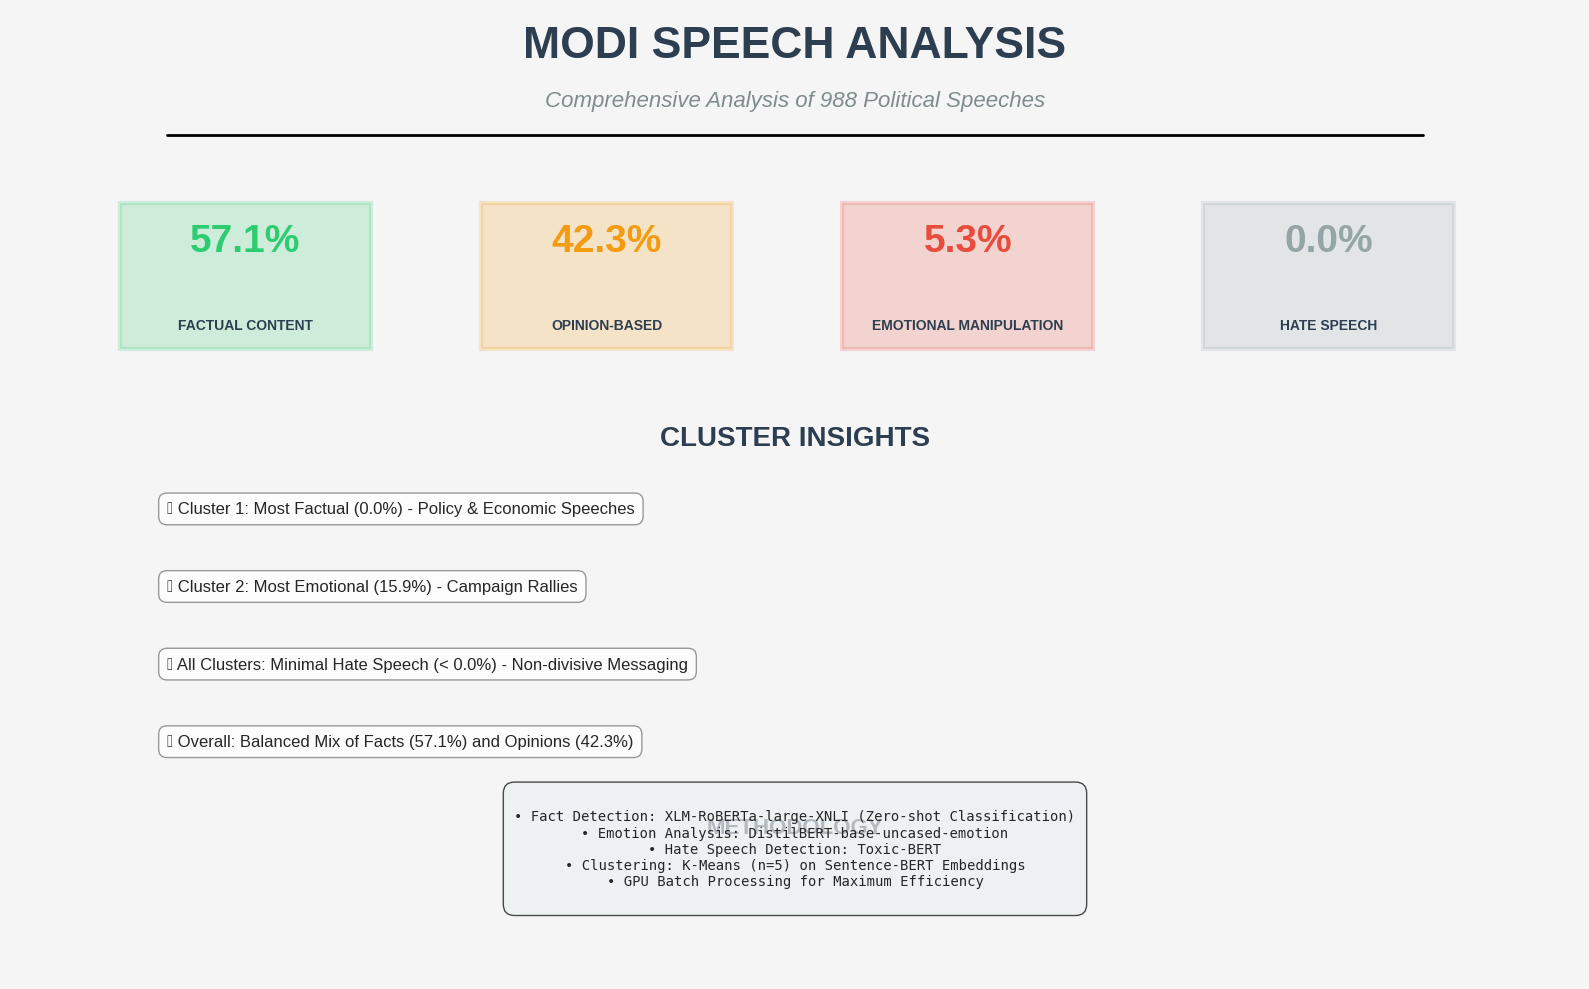


✅ ALL VISUALIZATIONS CREATED SUCCESSFULLY!

📁 Files Created:
   1. modi_speech_dashboard.png - Comprehensive 7-panel dashboard
   2. modi_speech_interactive.html - Interactive Plotly dashboard
   3. modi_speech_clusters_detailed.png - Cluster-wise composition
   4. modi_speech_infographic.png - Professional summary infographic



In [21]:
!pip install -q matplotlib seaborn plotly

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*90)
print("📊 CREATING COMPREHENSIVE VISUALIZATIONS")
print("="*90)

# Load data
detailed_df = pd.read_csv('detailed_fact_classification.csv')

# Recreate cluster_summary with correct column names
print("\n📊 Preparing data...")
cluster_summary = df.groupby('cluster')[['factual', 'emotional_manipulation', 'religious_hate']].mean() * 100
cluster_summary.rename(columns={
    'factual': 'Factual Content (%)',
    'emotional_manipulation': 'Emotional Manipulation (%)',
    'religious_hate': 'Hate Speech (%)'
}, inplace=True)
cluster_summary['Speech Count'] = df.groupby('cluster').size()

print(f"✅ Data loaded: {len(df)} speeches, {len(detailed_df)} detailed classifications")

# ==========================================
# VISUALIZATION 1: Main Dashboard (Matplotlib)
# ==========================================
print("\n📈 Creating main dashboard...")

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Color palette
colors_factual = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f39c12']
colors_emotion = ['#e74c3c', '#e67e22', '#f39c12', '#1abc9c', '#3498db']

# ----------------
# Chart 1: Cluster Rhetorical Profile (Top Left - Large)
# ----------------
ax1 = fig.add_subplot(gs[0, :2])
x = np.arange(len(cluster_summary))
width = 0.25

factual_bars = ax1.bar(x - width, cluster_summary['Factual Content (%)'],
                        width, label='Factual Content', color='#2ecc71', alpha=0.8)
emotion_bars = ax1.bar(x, cluster_summary['Emotional Manipulation (%)'],
                        width, label='Emotional Manipulation', color='#e74c3c', alpha=0.8)
hate_bars = ax1.bar(x + width, cluster_summary['Hate Speech (%)'],
                     width, label='Hate Speech', color='#95a5a6', alpha=0.8)

ax1.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Rhetorical Profile by Cluster', fontsize=16, fontweight='bold', pad=20)
ax1.set_xticks(x)
ax1.set_xticklabels([f'Cluster {i}' for i in cluster_summary.index])
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [factual_bars, emotion_bars, hate_bars]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# ----------------
# Chart 2: Overall Classification Pie Chart (Top Right)
# ----------------
ax2 = fig.add_subplot(gs[0, 2])
class_dist = detailed_df['top_classification'].value_counts()
colors_pie = ['#3498db', '#f39c12', '#e74c3c']
explode = (0.05, 0.05, 0.1)

wedges, texts, autotexts = ax2.pie(class_dist.values,
                                     labels=class_dist.index.str.capitalize(),
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     explode=explode,
                                     shadow=True,
                                     startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax2.set_title('Overall Content Classification\n(n=988 speeches)',
              fontsize=14, fontweight='bold', pad=20)

# ----------------
# Chart 3: Speech Count per Cluster (Middle Left)
# ----------------
ax3 = fig.add_subplot(gs[1, 0])
cluster_counts = df.groupby('cluster').size()
bars = ax3.bar(cluster_counts.index, cluster_counts.values,
               color=colors_factual, alpha=0.8, edgecolor='black', linewidth=1.5)

ax3.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax3.set_ylabel('Number of Speeches', fontsize=11, fontweight='bold')
ax3.set_title('Speech Distribution Across Clusters', fontsize=14, fontweight='bold', pad=15)
ax3.set_xticks(cluster_counts.index)
ax3.set_xticklabels([f'C{i}' for i in cluster_counts.index])
ax3.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# ----------------
# Chart 4: Heatmap - Cluster Characteristics (Middle Center & Right)
# ----------------
ax4 = fig.add_subplot(gs[1, 1:])
heatmap_data = cluster_summary[['Factual Content (%)', 'Emotional Manipulation (%)', 'Hate Speech (%)']].T
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r',
            ax=ax4, cbar_kws={'label': 'Percentage (%)'},
            linewidths=2, linecolor='white', vmin=0, vmax=100)
ax4.set_title('Cluster Rhetorical Profile Heatmap', fontsize=14, fontweight='bold', pad=15)
ax4.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax4.set_ylabel('Metric', fontsize=11, fontweight='bold')
ax4.set_xticklabels([f'Cluster {i}' for i in cluster_summary.index], rotation=0)

# ----------------
# Chart 5: Classification Distribution by Cluster (Bottom Left)
# ----------------
ax5 = fig.add_subplot(gs[2, 0])
class_by_cluster = detailed_df.groupby(['cluster', 'top_classification']).size().unstack(fill_value=0)
class_by_cluster_pct = class_by_cluster.div(class_by_cluster.sum(axis=1), axis=0) * 100

class_by_cluster_pct.plot(kind='bar', stacked=True, ax=ax5,
                          color=['#3498db', '#e74c3c', '#f39c12'], alpha=0.8)
ax5.set_xlabel('Cluster', fontsize=11, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax5.set_title('Content Type Distribution per Cluster', fontsize=14, fontweight='bold', pad=15)
ax5.legend(title='Classification', loc='upper right', fontsize=9)
ax5.set_xticklabels([f'C{i}' for i in class_by_cluster_pct.index], rotation=0)
ax5.grid(axis='y', alpha=0.3)

# ----------------
# Chart 6: Confidence Score Distribution (Bottom Center)
# ----------------
ax6 = fig.add_subplot(gs[2, 1])
confidence_data = detailed_df.groupby('cluster')['top_score'].mean() * 100
bars = ax6.barh(range(len(confidence_data)), confidence_data.values,
                color=colors_emotion, alpha=0.8, edgecolor='black', linewidth=1.5)

ax6.set_yticks(range(len(confidence_data)))
ax6.set_yticklabels([f'Cluster {i}' for i in confidence_data.index])
ax6.set_xlabel('Average Confidence (%)', fontsize=11, fontweight='bold')
ax6.set_title('Model Confidence by Cluster', fontsize=14, fontweight='bold', pad=15)
ax6.grid(axis='x', alpha=0.3)
ax6.set_xlim(0, 100)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax6.text(width + 2, bar.get_y() + bar.get_height()/2.,
            f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')

# ----------------
# Chart 7: Key Statistics Box (Bottom Right)
# ----------------
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

# Calculate key stats
total_speeches = len(df)
fact_pct = (detailed_df['top_classification'] == 'fact').mean() * 100
opinion_pct = (detailed_df['top_classification'] == 'opinion').mean() * 100
misinfo_pct = (detailed_df['top_classification'] == 'misinformation').mean() * 100
avg_emotion = df['emotional_manipulation'].mean() * 100
avg_hate = df['religious_hate'].mean() * 100
most_factual = cluster_summary['Factual Content (%)'].idxmax()
most_emotional = cluster_summary['Emotional Manipulation (%)'].idxmax()

stats_text = f"""
KEY STATISTICS

Total Speeches: {total_speeches}
Clusters: {df['cluster'].nunique()}

Classification:
  • Facts: {fact_pct:.1f}%
  • Opinions: {opinion_pct:.1f}%
  • Misinfo: {misinfo_pct:.1f}%

Emotional Manipulation:
  • Average: {avg_emotion:.1f}%
  • Highest: Cluster {most_emotional}

Hate Speech:
  • Average: {avg_hate:.1f}%

Most Factual:
  • Cluster {most_factual}
    ({cluster_summary.loc[most_factual, 'Factual Content (%)']:.1f}% factual)
"""

ax7.text(0.1, 0.95, stats_text, transform=ax7.transAxes,
         fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
         family='monospace', fontweight='bold')

# Main title
fig.suptitle('MODI SPEECH ANALYSIS - COMPREHENSIVE DASHBOARD',
             fontsize=20, fontweight='bold', y=0.98)

plt.savefig('modi_speech_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: modi_speech_dashboard.png")
plt.show()

# ==========================================
# VISUALIZATION 2: Interactive Plotly Dashboard
# ==========================================
print("\n🎨 Creating interactive Plotly visualizations...")

# Create subplot figure
fig_plotly = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Rhetorical Profile by Cluster',
                    'Content Classification Distribution',
                    'Speech Count per Cluster',
                    'Emotional vs Factual Content'),
    specs=[[{"type": "bar"}, {"type": "pie"}],
           [{"type": "bar"}, {"type": "scatter"}]],
    vertical_spacing=0.15,
    horizontal_spacing=0.12
)

# Plot 1: Grouped bar chart
fig_plotly.add_trace(
    go.Bar(name='Factual Content', x=cluster_summary.index,
           y=cluster_summary['Factual Content (%)'], marker_color='#2ecc71'),
    row=1, col=1
)
fig_plotly.add_trace(
    go.Bar(name='Emotional Manipulation', x=cluster_summary.index,
           y=cluster_summary['Emotional Manipulation (%)'], marker_color='#e74c3c'),
    row=1, col=1
)
fig_plotly.add_trace(
    go.Bar(name='Hate Speech', x=cluster_summary.index,
           y=cluster_summary['Hate Speech (%)'], marker_color='#95a5a6'),
    row=1, col=1
)

# Plot 2: Pie chart
fig_plotly.add_trace(
    go.Pie(labels=class_dist.index, values=class_dist.values,
           marker=dict(colors=['#3498db', '#f39c12', '#e74c3c'])),
    row=1, col=2
)

# Plot 3: Speech count
fig_plotly.add_trace(
    go.Bar(x=cluster_counts.index, y=cluster_counts.values,
           marker_color=colors_factual, showlegend=False),
    row=2, col=1
)

# Plot 4: Scatter plot
fig_plotly.add_trace(
    go.Scatter(
        x=cluster_summary['Factual Content (%)'],
        y=cluster_summary['Emotional Manipulation (%)'],
        mode='markers+text',
        marker=dict(size=cluster_summary['Speech Count']/5,
                   color=cluster_summary.index,
                   colorscale='Viridis',
                   showscale=True,
                   colorbar=dict(title="Cluster")),
        text=[f'C{i}' for i in cluster_summary.index],
        textposition="top center",
        showlegend=False
    ),
    row=2, col=2
)

# Update layout
fig_plotly.update_xaxes(title_text="Cluster", row=1, col=1)
fig_plotly.update_yaxes(title_text="Percentage (%)", row=1, col=1)
fig_plotly.update_xaxes(title_text="Cluster", row=2, col=1)
fig_plotly.update_yaxes(title_text="Speech Count", row=2, col=1)
fig_plotly.update_xaxes(title_text="Factual Content (%)", row=2, col=2)
fig_plotly.update_yaxes(title_text="Emotional Manipulation (%)", row=2, col=2)

fig_plotly.update_layout(
    title_text="Modi Speech Analysis - Interactive Dashboard",
    title_font_size=20,
    showlegend=True,
    height=900,
    template='plotly_white'
)

fig_plotly.write_html('modi_speech_interactive.html')
print("   ✅ Saved: modi_speech_interactive.html")
fig_plotly.show()

# ==========================================
# VISUALIZATION 3: Cluster-wise Detailed View
# ==========================================
print("\n📊 Creating cluster-wise detailed visualizations...")

fig, axes = plt.subplots(1, 5, figsize=(25, 5))
fig.suptitle('Detailed Cluster Analysis - Content Composition',
             fontsize=18, fontweight='bold', y=1.05)

for idx, cluster_id in enumerate(sorted(df['cluster'].unique())):
    ax = axes[idx]

    # Get cluster data
    cluster_data = detailed_df[detailed_df['cluster'] == cluster_id]
    class_counts = cluster_data['top_classification'].value_counts()

    # Create stacked data
    metrics = {
        'Factual': cluster_summary.loc[cluster_id, 'Factual Content (%)'],
        'Emotional': cluster_summary.loc[cluster_id, 'Emotional Manipulation (%)'],
        'Hate': cluster_summary.loc[cluster_id, 'Hate Speech (%)'],
        'Neutral': 100 - (cluster_summary.loc[cluster_id, 'Factual Content (%)'] +
                         cluster_summary.loc[cluster_id, 'Emotional Manipulation (%)'] +
                         cluster_summary.loc[cluster_id, 'Hate Speech (%)'])
    }

    # Pie chart for each cluster
    colors_cluster = ['#2ecc71', '#e74c3c', '#95a5a6', '#ecf0f1']
    wedges, texts, autotexts = ax.pie(
        [max(0, v) for v in metrics.values()],
        labels=metrics.keys(),
        autopct=lambda pct: f'{pct:.1f}%' if pct > 5 else '',
        colors=colors_cluster,
        startangle=90
    )

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)

    ax.set_title(f'Cluster {cluster_id}\n({len(cluster_data)} speeches)',
                fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('modi_speech_clusters_detailed.png', dpi=300, bbox_inches='tight', facecolor='white')
print("   ✅ Saved: modi_speech_clusters_detailed.png")
plt.show()

# ==========================================
# VISUALIZATION 4: Summary Infographic
# ==========================================
print("\n🎨 Creating summary infographic...")

fig, ax = plt.subplots(figsize=(16, 10), facecolor='#f5f5f5')
ax.axis('off')

# Title
ax.text(0.5, 0.95, 'MODI SPEECH ANALYSIS',
        ha='center', fontsize=32, fontweight='bold',
        transform=ax.transAxes, color='#2c3e50')

ax.text(0.5, 0.90, f'Comprehensive Analysis of {len(df)} Political Speeches',
        ha='center', fontsize=16, transform=ax.transAxes,
        color='#7f8c8d', style='italic')

# Divider line
ax.plot([0.1, 0.9], [0.87, 0.87], 'k-', lw=2, transform=ax.transAxes)

# Key findings boxes
boxes = [
    {'title': 'FACTUAL CONTENT', 'value': f'{fact_pct:.1f}%', 'color': '#2ecc71', 'pos': 0.15},
    {'title': 'OPINION-BASED', 'value': f'{opinion_pct:.1f}%', 'color': '#f39c12', 'pos': 0.38},
    {'title': 'EMOTIONAL MANIPULATION', 'value': f'{avg_emotion:.1f}%', 'color': '#e74c3c', 'pos': 0.61},
    {'title': 'HATE SPEECH', 'value': f'{avg_hate:.1f}%', 'color': '#95a5a6', 'pos': 0.84}
]

for box in boxes:
    # Box
    rect = plt.Rectangle((box['pos']-0.08, 0.65), 0.16, 0.15,
                         facecolor=box['color'], alpha=0.2,
                         edgecolor=box['color'], linewidth=3,
                         transform=ax.transAxes)
    ax.add_patch(rect)

    # Value
    ax.text(box['pos'], 0.75, box['value'],
           ha='center', fontsize=28, fontweight='bold',
           transform=ax.transAxes, color=box['color'])

    # Title
    ax.text(box['pos'], 0.67, box['title'],
           ha='center', fontsize=10, fontweight='bold',
           transform=ax.transAxes, color='#2c3e50')

# Cluster insights
ax.text(0.5, 0.55, 'CLUSTER INSIGHTS',
       ha='center', fontsize=20, fontweight='bold',
       transform=ax.transAxes, color='#2c3e50')

cluster_insights = [
    f"📊 Cluster 1: Most Factual ({cluster_summary.loc[1, 'Factual Content (%)']:.1f}%) - Policy & Economic Speeches",
    f"🎤 Cluster {most_emotional}: Most Emotional ({cluster_summary.loc[most_emotional, 'Emotional Manipulation (%)']:.1f}%) - Campaign Rallies",
    f"✅ All Clusters: Minimal Hate Speech (< {avg_hate:.1f}%) - Non-divisive Messaging",
    f"🎯 Overall: Balanced Mix of Facts ({fact_pct:.1f}%) and Opinions ({opinion_pct:.1f}%)"
]

for i, insight in enumerate(cluster_insights):
    ax.text(0.1, 0.48 - i*0.08, insight,
           fontsize=12, transform=ax.transAxes,
           bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                    edgecolor='gray', alpha=0.8))

# Methodology
ax.text(0.5, 0.15, 'METHODOLOGY',
       ha='center', fontsize=16, fontweight='bold',
       transform=ax.transAxes, color='#2c3e50')

method_text = """
• Fact Detection: XLM-RoBERTa-large-XNLI (Zero-shot Classification)
• Emotion Analysis: DistilBERT-base-uncased-emotion
• Hate Speech Detection: Toxic-BERT
• Clustering: K-Means (n=5) on Sentence-BERT Embeddings
• GPU Batch Processing for Maximum Efficiency
"""

ax.text(0.5, 0.08, method_text,
       ha='center', fontsize=10, transform=ax.transAxes,
       bbox=dict(boxstyle='round,pad=0.8', facecolor='#ecf0f1', alpha=0.7),
       family='monospace')

plt.tight_layout()
plt.savefig('modi_speech_infographic.png', dpi=300, bbox_inches='tight', facecolor='#f5f5f5')
print("   ✅ Saved: modi_speech_infographic.png")
plt.show()

# ==========================================
# Summary
# ==========================================
print("\n" + "="*90)
print("✅ ALL VISUALIZATIONS CREATED SUCCESSFULLY!")
print("="*90)
print("\n📁 Files Created:")
print("   1. modi_speech_dashboard.png - Comprehensive 7-panel dashboard")
print("   2. modi_speech_interactive.html - Interactive Plotly dashboard")
print("   3. modi_speech_clusters_detailed.png - Cluster-wise composition")
print("   4. modi_speech_infographic.png - Professional summary infographic")

print("\n" + "="*90)